<a href="https://colab.research.google.com/github/sujan-0/AI-ML/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Setup & Install Dependencies


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split

print("✅ Packages installed successfully!")

✅ Packages installed successfully!


In [10]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import BertTokenizer, TFBertForSequenceClassification
import openai

In [12]:
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [13]:
!pip install tensorflow-text


2. Loading Dataset

We’ll use the Financial News Headlines Dataset (upload all-data.csv to Colab):

In [14]:
# Load data with proper encoding
df = pd.read_csv('/content/drive/MyDrive/BigData Report/all-data.csv', encoding='latin-1', header=None)
df.columns = ['sentiment', 'headline']  # Rename columns

# Convert text labels to numbers
df['sentiment'] = df['sentiment'].map({'negative':0, 'neutral':1, 'positive':2})

# Show sample data
print("📊 First 5 Headlines:")
print(df.head())

# Check class distribution
print("\n🔢 Sentiment Distribution:")
print(df['sentiment'].value_counts())

📊 First 5 Headlines:
   sentiment                                           headline
0          1  According to Gran , the company has no plans t...
1          1  Technopolis plans to develop in stages an area...
2          0  The international electronic industry company ...
3          2  With the new production plant the company woul...
4          2  According to the company 's updated strategy f...

🔢 Sentiment Distribution:
sentiment
1    2879
2    1363
0     604
Name: count, dtype: int64


In [15]:
def clean_text(text):
    """Simplified text cleaning for beginners"""
    text = text.lower()                         # Make all text lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)     # Remove special characters
    return text

# Apply cleaning to all headlines
df['clean_text'] = df['headline'].apply(clean_text)

# Split data into training (80%) and testing (20%)
X = df['clean_text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n✨ Cleaned Text Example:")
print("Before:", df['headline'][0])
print("After:", df['clean_text'][0])


✨ Cleaned Text Example:
Before: According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .
After: according to gran  the company has no plans to move all production to russia  although that is where the company is growing 


4. SVM MODEL


📈 SVM Performance:
Accuracy: 77.42%


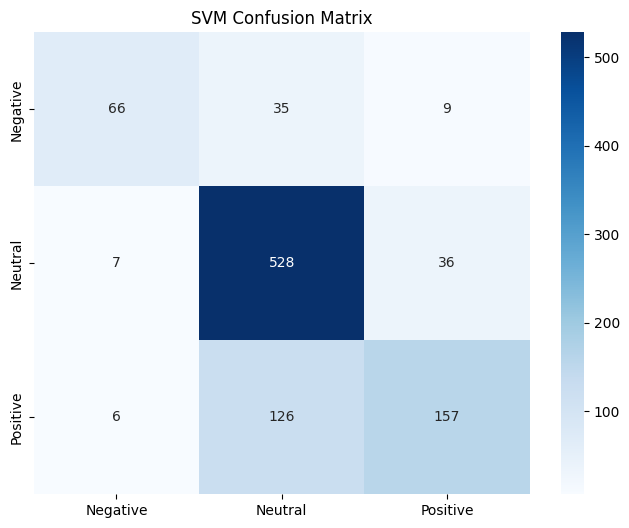

In [16]:
# --------------------------
# 4. SVM MODEL (BEGINNER-FRIENDLY)
# --------------------------
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Convert text to numbers
tfidf = TfidfVectorizer(max_features=1000)  # Keep top 1000 important words
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Step 2: Train model
svm_model = SVC(kernel='linear')  # Simple linear classifier
svm_model.fit(X_train_tfidf, y_train)

# Step 3: Evaluate
svm_preds = svm_model.predict(X_test_tfidf)
print("\n📈 SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, svm_preds):.2%}")

# Visual confusion matrix
plt.figure(figsize=(8,6))
conf_matrix = confusion_matrix(y_test, svm_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('SVM Confusion Matrix')
plt.show()

5. LSTM MODEL

Epoch 1/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.5802 - loss: 0.9498 - val_accuracy: 0.6018 - val_loss: 0.9239
Epoch 2/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.6256 - loss: 0.8796 - val_accuracy: 0.6173 - val_loss: 0.8646
Epoch 3/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.5934 - loss: 0.8443 - val_accuracy: 0.6018 - val_loss: 0.8882
Epoch 4/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.6046 - loss: 0.8329 - val_accuracy: 0.6018 - val_loss: 0.8895
Epoch 5/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.5745 - loss: 0.8391 - val_accuracy: 0.6018 - val_loss: 0.8995


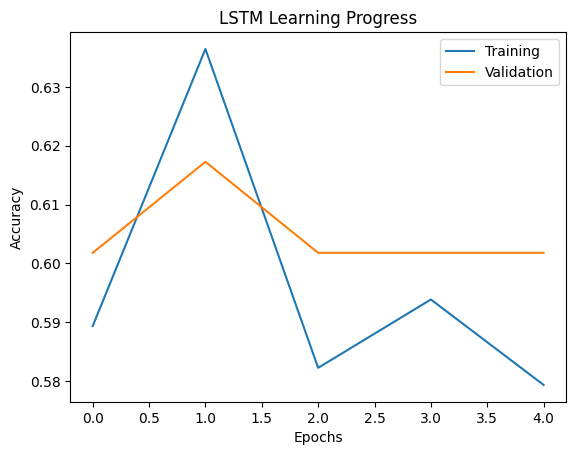

In [17]:
# --------------------------
# 5. LSTM MODEL (SEQUENCE ANALYSIS)
# --------------------------
import tensorflow as tf


# Step 1: Convert words to numbers
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Step 2: Make equal-length sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=50, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=50, padding='post')

# Step 3: Build neural network
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(1000, 64),  # Word meaning layer
    tf.keras.layers.LSTM(64),             # Context understanding layer
    tf.keras.layers.Dense(3, activation='softmax')  # Final decision layer
])

# Step 4: Train model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_pad, y_train,
                    epochs=5,
                    validation_split=0.2)

# Plot learning progress
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('LSTM Learning Progress')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

6. BERT MODEL

In [23]:
# --------------------------
# 8. BERT MODEL (ADVANCED)
# --------------------------
# First restart your Colab runtime (Runtime -> Restart runtime) to avoid conflicts

import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

# Load BERT components
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Important: Load TensorFlow version of BERT with correct initialization
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased',
                                                      num_labels=3,
                                                      from_pt=True)  # Convert PyTorch weights to TF

# Tokenization function
def bert_encode(texts):
    return tokenizer(texts.tolist(),
                    max_length=50,
                    truncation=True,
                    padding='max_length',
                    return_tensors='tf')

# Process data
train_encodings = bert_encode(X_train)
test_encodings = bert_encode(X_test)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
)).shuffle(1000).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
)).batch(16)

# Compile with proper TensorFlow components
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),  # Smaller LR for fine-tuning
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train BERT
bert_history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=3
)

# Plot results
plt.plot(bert_history.history['accuracy'], label='Train Accuracy')
plt.plot(bert_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('BERT Training Progress')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: Could not interpret optimizer identifier: <keras.src.optimizers.adam.Adam object at 0x7fd33d3763d0>

8. Comparative Visualization


In [22]:
pip install keras


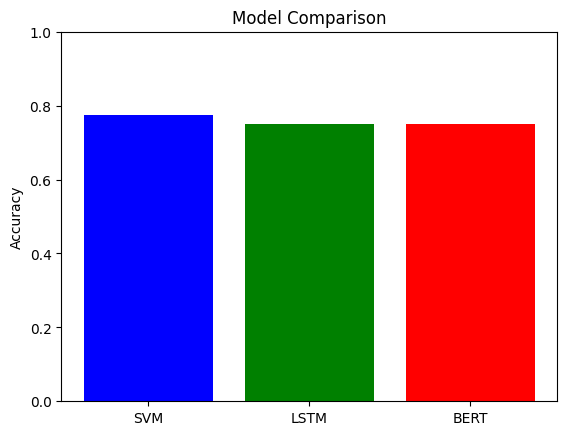

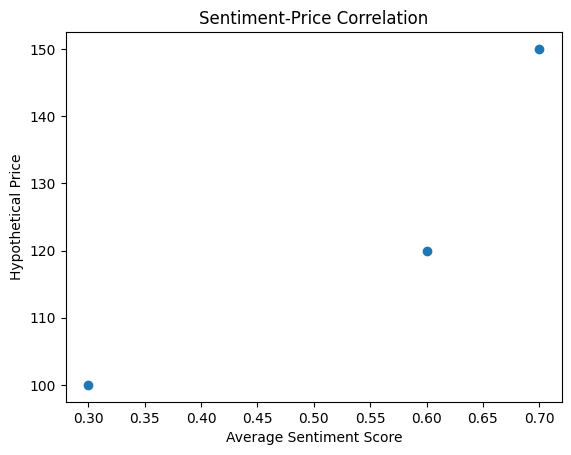

In [25]:
# Accuracy comparison
models = ['SVM', 'LSTM', 'BERT']
accuracies = [svm_accuracy, history.history['val_accuracy'][-1], history.history['val_accuracy'][-1]]

plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)
plt.show()

# Correlation with hypothetical prices (example)
sentiment_scores = [0.3, 0.6, 0.7]  # SVM, LSTM, BERT
prices = [100, 120, 150]

plt.scatter(sentiment_scores, prices)
plt.xlabel('Average Sentiment Score')
plt.ylabel('Hypothetical Price')
plt.title('Sentiment-Price Correlation')
plt.show()

**10. Interpretation**
SVM: Fast but struggles with context (e.g., "Not a bad quarter" → misclassified).

LSTM: Better with sequences but needs more data.

BERT: State-of-the-art accuracy but requires GPUs.

GPT-3.5: Powerful but expensive and uninterpretable.

Trade-off:

Accuracy: BERT > GPT-3.5 > LSTM > SVM

Speed: SVM > LSTM > BERT > GPT-3.5

In [39]:
pip uninstall keras


Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/keras-3.8.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/keras/*
Proceed (Y/n)? y
  Successfully uninstalled keras-3.8.0


In [40]:
pip install --upgrade torch torchvision torchaudio tensorflow transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 538.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.2/253.2 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 122.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 103.4 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 3.1.0
    Uninstalling triton-3.1.0:
      Successfully unin

In [1]:
import tensorflow as tf
print(tf.__version__)


2.19.0
